In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestNeighbors

import time

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb

In [3]:
np.random.seed(0)

In [4]:
#### reading the data
data = pd.read_csv(r"creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
numeric_cols = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

len(numeric_cols)

30

In [9]:
int(len(data)*0.1)

28480

In [10]:
small_sub = data.sample(int(len(data)*0.1))

In [11]:
small_sub.shape

(28480, 31)

In [13]:
for col in data.columns:
    print(col)
    print(ks_2samp(small_sub[col], data[col]))
    print("--"*30)


Time
KstestResult(statistic=0.0029919190446847654, pvalue=0.9740745041314022, statistic_location=136676.0, statistic_sign=1)
------------------------------------------------------------
V1
KstestResult(statistic=0.005804036775663102, pvalue=0.3463241520019974, statistic_location=-0.343706800459705, statistic_sign=1)
------------------------------------------------------------
V2
KstestResult(statistic=0.007660723837112138, pvalue=0.09527423586587014, statistic_location=0.313126416910685, statistic_sign=-1)
------------------------------------------------------------
V3
KstestResult(statistic=0.0052900466294482085, pvalue=0.4619251374159412, statistic_location=0.134432811462959, statistic_sign=-1)
------------------------------------------------------------
V4
KstestResult(statistic=0.004426568383209872, pvalue=0.6889997784140736, statistic_location=-0.455511851586218, statistic_sign=1)
------------------------------------------------------------
V5
KstestResult(statistic=0.006217039699


#### This shows that the small_sub is representative of data 

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### no missing values ##

In [15]:
sub = small_sub.copy()

In [16]:
sub = sub[numeric_cols]
sub.shape

(28480, 30)

In [17]:
df_num = MinMaxScaler().fit_transform(sub)
pd.DataFrame(df_num).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.728171,0.930566,0.747766,0.924522,0.223081,0.807006,0.213344,0.169347,0.606019,0.500243,...,0.779307,0.484459,0.567040,0.516664,0.375948,0.472359,0.343380,0.177604,0.501661,0.001557
1,0.909992,0.929907,0.745482,0.928186,0.220646,0.806374,0.206467,0.168310,0.607205,0.492704,...,0.775275,0.483001,0.538910,0.522483,0.448266,0.411112,0.367671,0.176777,0.502125,0.000077
2,0.882419,0.898292,0.684396,0.931694,0.285225,0.814791,0.195299,0.153363,0.616131,0.564045,...,0.782633,0.505014,0.677522,0.547530,0.468606,0.272268,0.141151,0.182245,0.510547,0.003737
3,0.294691,0.876737,0.744165,0.953059,0.304048,0.785137,0.236605,0.164838,0.603369,0.495152,...,0.762573,0.507480,0.646369,0.527024,0.347095,0.451855,0.307509,0.161457,0.475223,0.011989
4,0.115104,0.972107,0.718410,0.939569,0.242359,0.790376,0.208693,0.155711,0.607369,0.569574,...,0.774842,0.485990,0.592341,0.524934,0.427122,0.489012,0.289999,0.174699,0.496581,0.000195


In [18]:
pd.DataFrame(df_num).describe()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,...,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000,28480.000000
mean,0.547613,0.938296,0.728597,0.925471,0.252441,0.798242,0.214404,0.161236,0.608907,0.510398,...,0.776460,0.489143,0.597154,0.523287,0.381960,0.451143,0.341835,0.174938,0.496493,0.003354
std,0.274623,0.049329,0.029943,0.029529,0.069037,0.010597,0.014848,0.009561,0.025096,0.064502,...,0.011912,0.016734,0.051087,0.015312,0.082195,0.051525,0.093185,0.011292,0.011341,0.010740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.312970,0.915725,0.717455,0.908733,0.211006,0.793374,0.206117,0.157362,0.604165,0.472665,...,0.773611,0.483952,0.559500,0.519201,0.334215,0.419730,0.279219,0.172918,0.494770,0.000210
50%,0.489541,0.938640,0.729857,0.929154,0.251270,0.797846,0.211399,0.161549,0.609315,0.507269,...,0.775758,0.488387,0.597839,0.522979,0.387833,0.452536,0.331575,0.174845,0.496850,0.000854
75%,0.804838,0.971381,0.743316,0.945071,0.288707,0.802548,0.218621,0.165269,0.616150,0.546015,...,0.778530,0.493259,0.634512,0.526977,0.441586,0.485819,0.388309,0.177244,0.499032,0.002958
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


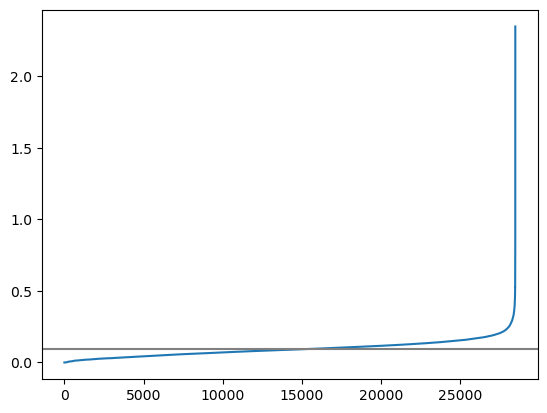

time taken for optimizing epsilon in dbscan is  1.9858295917510986 seconds


In [19]:
start_time = time.time()

neigh = NearestNeighbors(n_neighbors=60) ## 60 as it is double of number of numeric columns ##
nbrs = neigh.fit(df_num)
distances, indices = nbrs.kneighbors(df_num)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
#plt.axhline(y =0.07,color='gray')
#plt.axhline(y =0.06,color='gray')
#plt.axhline(y =0.05,color='gray')
#plt.axhline(y =0.03,color='gray')
plt.axhline(y =0.095,color='gray')
plt.show()

end_time = time.time()
print("time taken for optimizing epsilon in dbscan is " , end_time - start_time , "seconds")

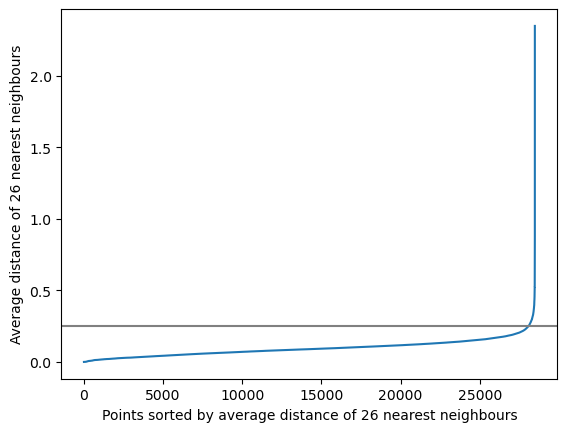

In [20]:
## little fancy line plot for distance ##
## axis description ##
plt.plot(distances)
plt.axhline(y =0.25,color='gray')
plt.xlabel("Points sorted by average distance of 26 nearest neighbours")
plt.ylabel("Average distance of 26 nearest neighbours")
plt.show()

#### Now applying DBSCAN eith these parameters ###

In [21]:
start_time = time.time()

db = DBSCAN(eps = 0.25, min_samples = 60).fit(df_num)

end_time = time.time()
print("time taken for this dbscan is " , end_time - start_time , "seconds")

time taken for this dbscan is  2.3602681159973145 seconds


In [22]:
labels = db.labels_
small_sub['labels'] = labels

In [23]:

small_sub['target'] = np.where(small_sub['labels']==0 , 0 , 1)

In [24]:
small_sub.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,labels,target
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0,0,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0,0,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0,0,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0,0,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0,0,0


In [25]:
small_sub.labels.value_counts()

 0    27538
-1      942
Name: labels, dtype: int64

In [26]:
small_sub.Class.value_counts()

0    28425
1       55
Name: Class, dtype: int64

In [27]:
small_sub.target.value_counts()

0    27538
1      942
Name: target, dtype: int64

In [28]:
pd.crosstab(small_sub.Class , small_sub.target)

target,0,1
Class,,
0,27531,894
1,7,48


In [29]:
small_sub.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'labels', 'target'],
      dtype='object')

#### Now LightGBM training 5 folds ####

Fold 0
[LightGBM] [Info] Number of positive: 750, number of negative: 22034
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 22784, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032918 -> initscore=-3.380269
[LightGBM] [Info] Start training from score -3.380269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	training's auc: 0.974291	valid_1's auc: 0.966458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

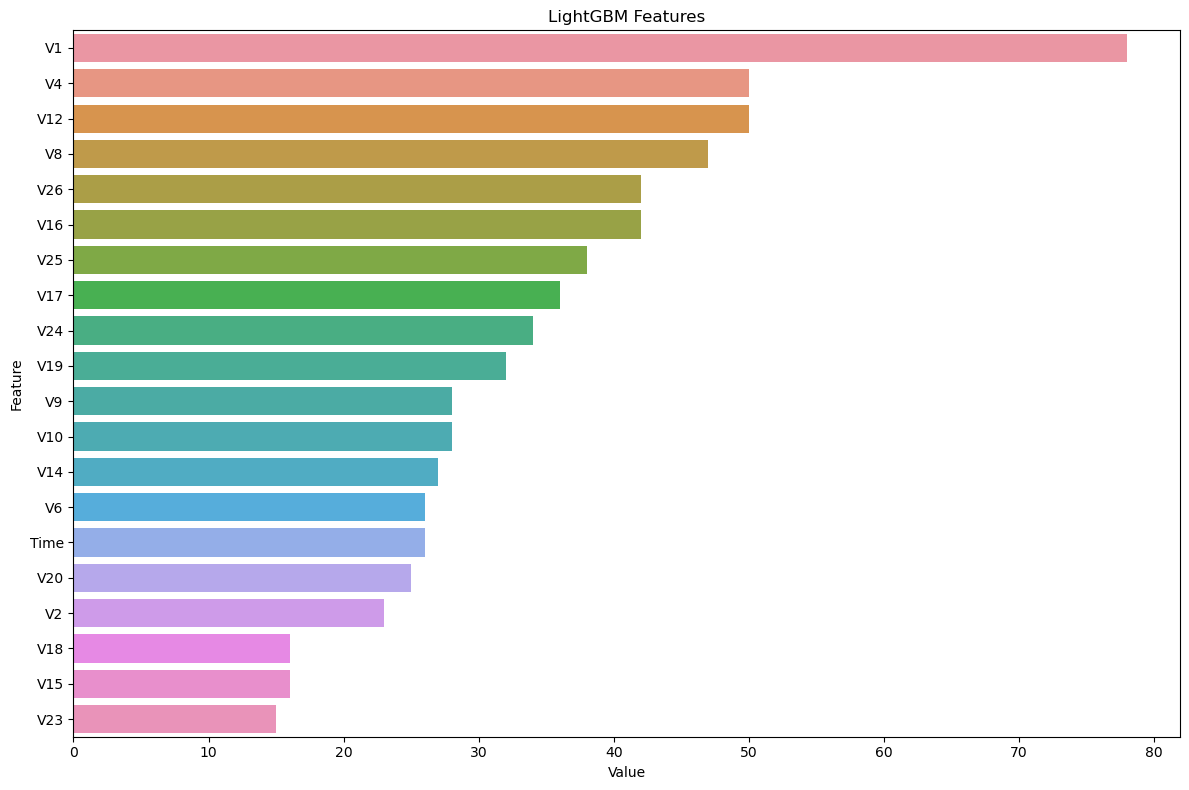

Fold 1
[LightGBM] [Info] Number of positive: 761, number of negative: 22023
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 22784, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033401 -> initscore=-3.365209
[LightGBM] [Info] Start training from score -3.365209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	training's auc: 0.978271	valid_1's auc: 0.971642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

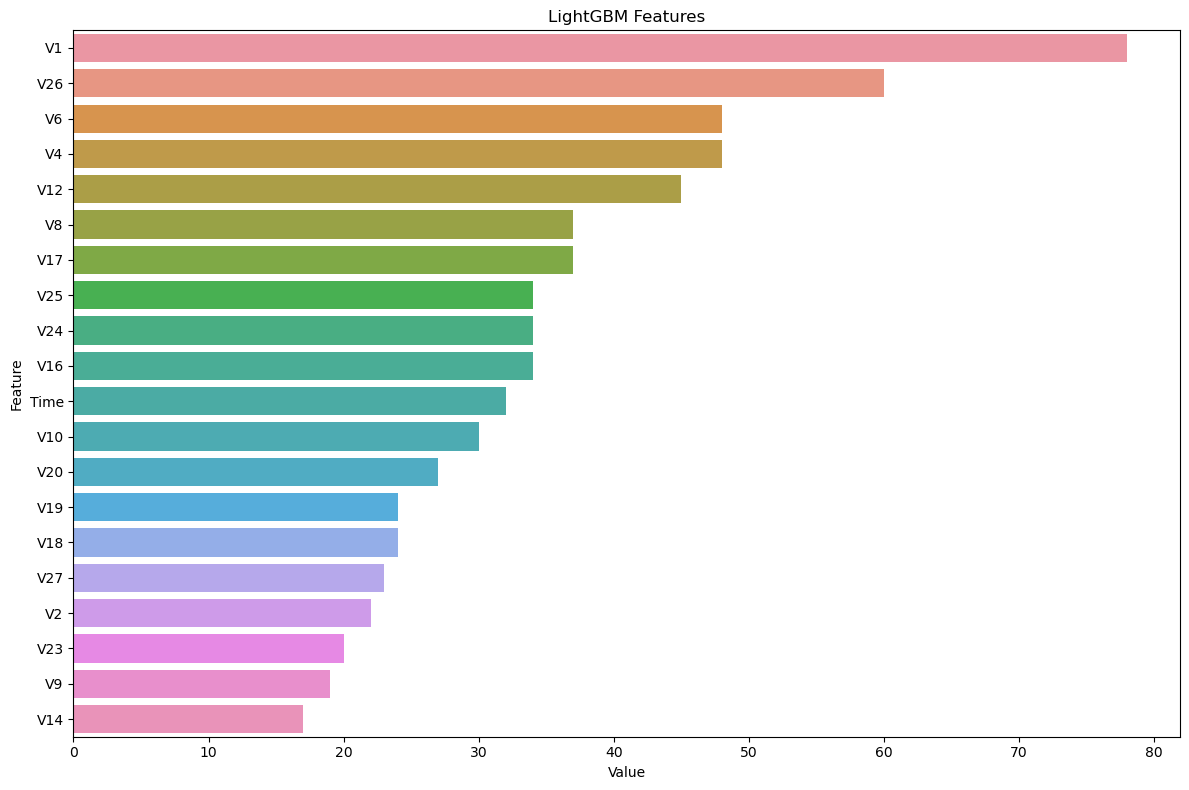

Fold 2
[LightGBM] [Info] Number of positive: 754, number of negative: 22030
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 22784, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033093 -> initscore=-3.374768
[LightGBM] [Info] Start training from score -3.374768
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	training's auc: 0.974707	valid_1's auc: 0.973851
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

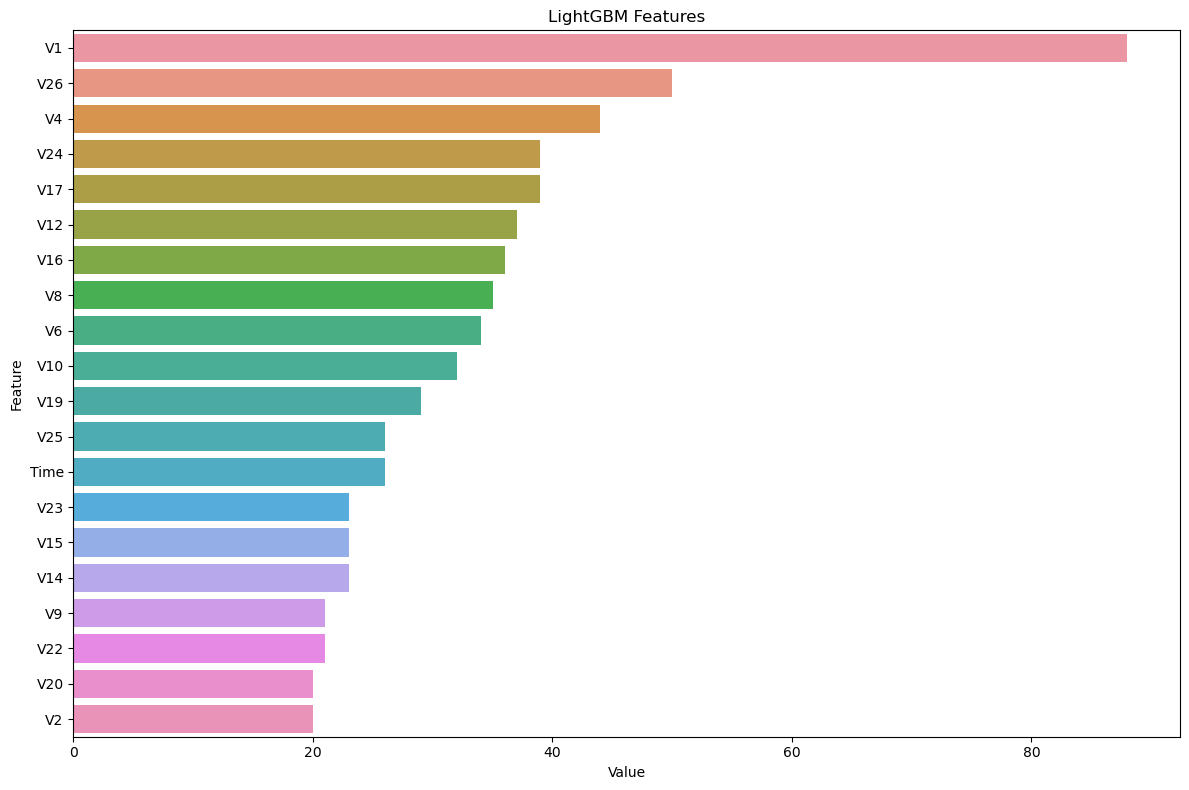

Fold 3
[LightGBM] [Info] Number of positive: 764, number of negative: 22020
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 22784, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.033532 -> initscore=-3.361139
[LightGBM] [Info] Start training from score -3.361139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	training's auc: 0.977099	valid_1's auc: 0.980772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

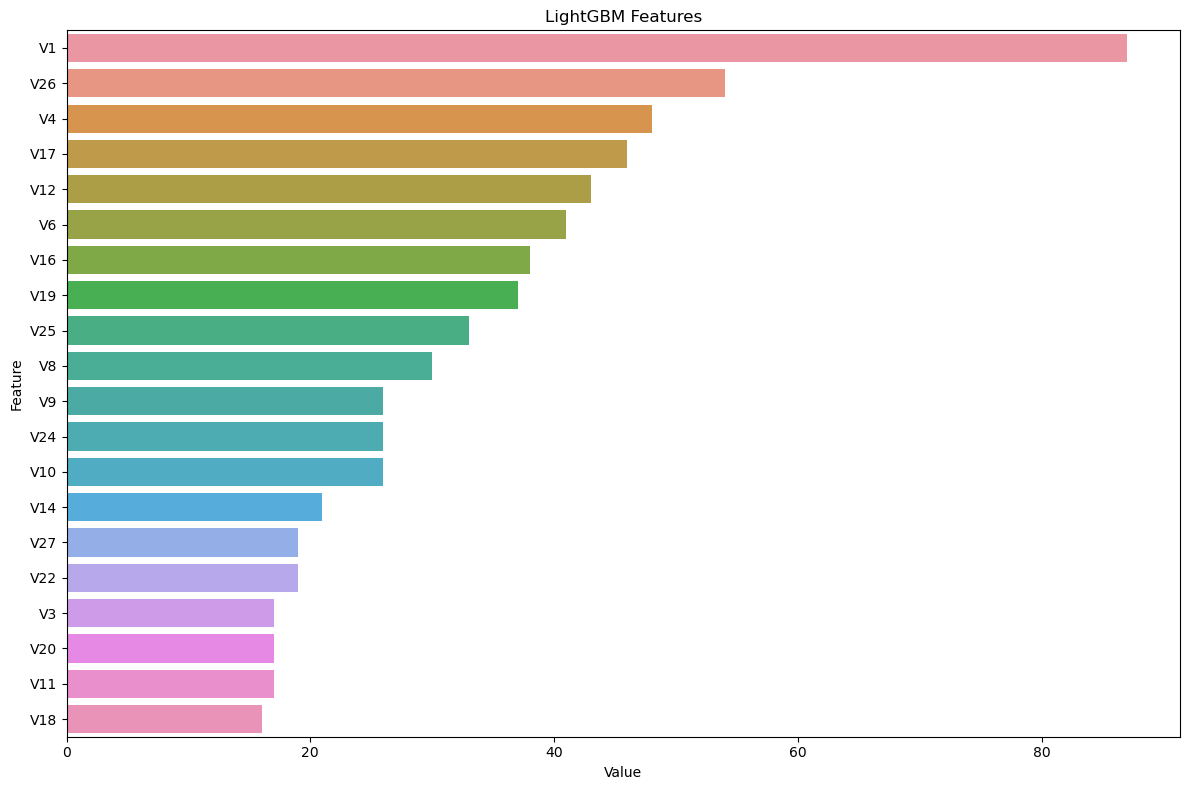

Fold 4
[LightGBM] [Info] Number of positive: 739, number of negative: 22045
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 22784, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032435 -> initscore=-3.395543
[LightGBM] [Info] Start training from score -3.395543
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	training's auc: 0.97

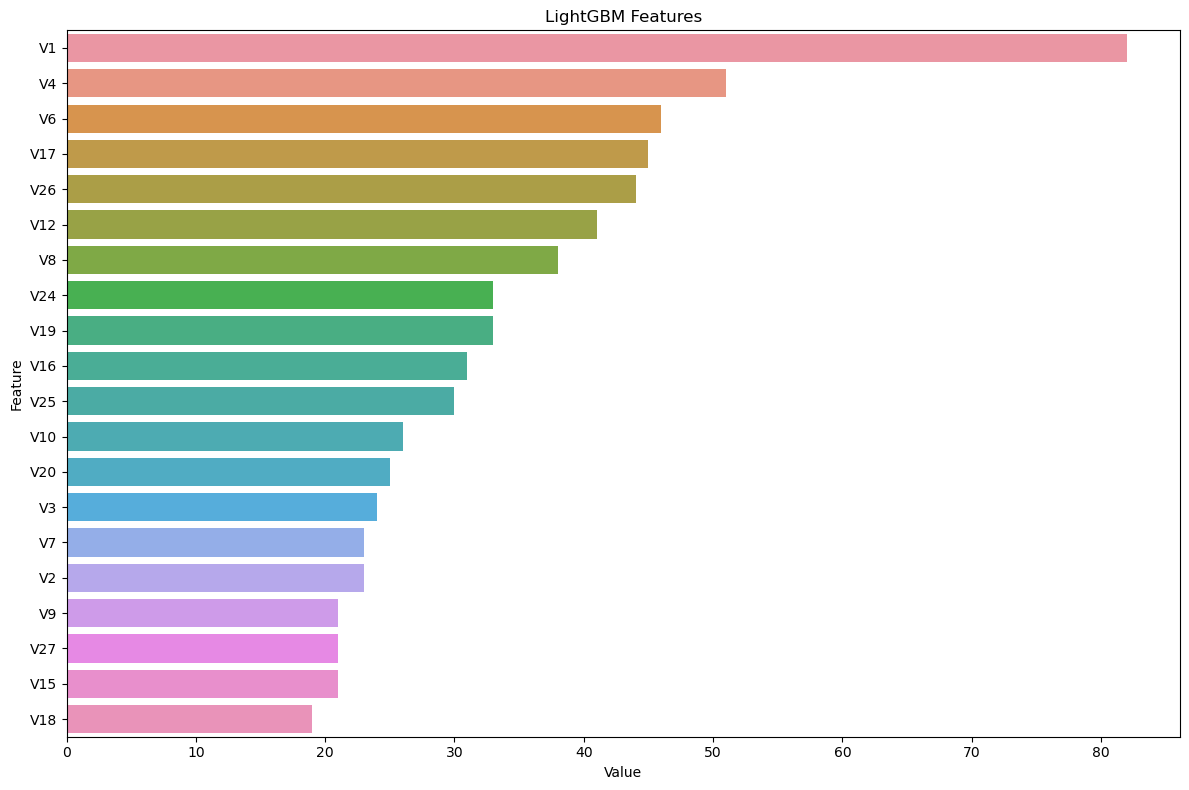

time taken for model run and predictions 4.043444633483887 seconds


In [31]:
N = 5
kf = KFold(n_splits=N)
y_train = small_sub['target'].copy()
start = time.time()

features = [c for c in small_sub.columns if c not in ['Class','labels','target']]

param = {
    'bagging_freq': 5,          
    'bagging_fraction': 0.2, 
    #'boost_from_average':'false',   
    'boost': 'gbdt',            
    'feature_fraction': 0.7,     
    'learning_rate': 0.05,
    'max_depth': -1,            
    'metric':'auc',               
    'min_data_in_leaf': 80,    
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 31,         
    #'num_threads': 8,           
    #'tree_learner': 'serial',  
    'objective': 'binary',
    #'reg_alpha': 0.1302650970728192,
    #'reg_lambda': 0.3603427518866501,
    'verbosity': 1
}
folds = KFold(n_splits=N)
oof = np.zeros(len(small_sub))

#predictions = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(small_sub.values, y_train.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(small_sub.iloc[trn_idx][features], label=y_train.iloc[trn_idx])
    val_data = lgb.Dataset(small_sub.iloc[val_idx][features], label=y_train.iloc[val_idx])
    clf = lgb.train(param, trn_data, 100, valid_sets = [trn_data, val_data], verbose_eval=20, early_stopping_rounds = 10)
    oof[val_idx] = clf.predict(small_sub.iloc[val_idx][features], num_iteration=clf.best_iteration)
    #predictions += clf.predict(X_test[features], num_iteration=clf.best_iteration) / folds.n_splits
    
    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),features)), columns=['Value','Feature'])
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
    plt.title('LightGBM Features')
    plt.tight_layout()
    plt.show()
    #print(feature_imp.Feature[:20])
    #a[fold_] = feature_imp.Feature[-20:].tolist()
    

stop = time.time()
print("time taken for model run and predictions" , stop - start , "seconds")

In [39]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestNeighbors

import time
import gc

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb

In [40]:
def rep_sample(X, frac):
    X1 = X.sample(int(len(X)*frac))
    #df_one[~df_one.index.isin(df_two.index)]
    X2 = X[~X.index.isin(X1.index)]
    return(X1,X2)

In [41]:
def representative_check(X,X1):
    counter = 0
    for col in X.columns:
        if ks_2samp(X1[col], X[col]).pvalue > 0.05:
            counter = counter + 1
    if counter == X.shape[1]:
        print("Sample is representative")
    else: print("Sample is not representative, try sampling again")   

In [42]:
def scale(X1):
    df_num = MinMaxScaler().fit_transform(X1)
    return(df_num)

In [43]:
def plot_optimal_eps(df_num):
    
    start_time = time.time()
    
    neigh = NearestNeighbors(n_neighbors=2*pd.DataFrame(df_num).shape[1])
    nbrs = neigh.fit(df_num)
    distances, indices = nbrs.kneighbors(df_num)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    plt.plot(distances)
    plt.xlabel("Points sorted by average distance of nearest neighbours")
    plt.ylabel("Average distance of "+str(2*pd.DataFrame(df_num).shape[1])+" nearest neighbours")
    plt.show()
    
    end_time = time.time()
    
    print("time taken for optimizing epsilon in DBSCAN is " , end_time - start_time , "seconds")

In [44]:
def pseudo_labels(df_num, opt_eps):
    
    start_time = time.time()
    
    db = DBSCAN(eps = opt_eps, min_samples = 2*X.shape[1]).fit(df_num)
    labels = db.labels_
    
    end_time = time.time()
    print("time taken for this dbscan is " , end_time - start_time , "seconds")
    
    return(labels)

In [45]:
def freq_labels(labels):
    unique, counts = np.unique(labels, return_counts=True)
    print (np.asarray((unique, counts)).T)

In [46]:
def create_train(X1,labels):
    X1["labels"] = labels
    X1['target'] = np.where(X1['labels']==0 , 0 , 1)
    del X1["labels"]
    gc.collect()
    return(X1)

In [47]:
param = {         
    'bagging_fraction': 0.6,  
    'boost': 'gbdt',            
    'feature_fraction': 0.6,     
    'learning_rate': 0.1,
    'max_depth': -1,            
    'metric':'auc',               
    'min_data_in_leaf': 40,    
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 31,           
    'objective': 'binary',
    'verbosity': 1
}

In [48]:
from sklearn.model_selection import GridSearchCV

def LightGBM_training(X1, N=5):
    y_train = X1['target'].copy()
    features = [c for c in X1.columns if c not in ['target']]
    
    # Define the hyperparameter grid
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],
        'num_leaves': [20, 30, 40],
        'max_depth': [5, 10, 15],
        'bagging_fraction': [0.6, 0.8],
        'feature_fraction': [0.6, 0.8]
    }
    
    # Create a LGBMClassifier object
    lgbm = lgb.LGBMClassifier(boost='gbdt', metric='auc', objective='binary')
    
    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=N, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X1[features], y_train)
    
    # Print the best hyperparameters and their corresponding score
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    
    # Fit the model with the best hyperparameters
    clf = lgb.train({**param, **grid_search.best_params_}, lgb.Dataset(X1[features], label=y_train), 100)
    
    # Get the feature importances
    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),features)), columns=['Value','Feature'])
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
    plt.title('LightGBM Features')
    plt.tight_layout()
    plt.show()
    
    return clf


In [49]:
X = pd.read_csv(r"creditcard.csv")

In [50]:
frac = 100000/(284807-100000)
frac

0.5411050447223319

In [51]:
x1,x2 = rep_sample(X,frac)

In [52]:
representative_check(X,x1)

Sample is representative


In [53]:
df_num = scale(x1)

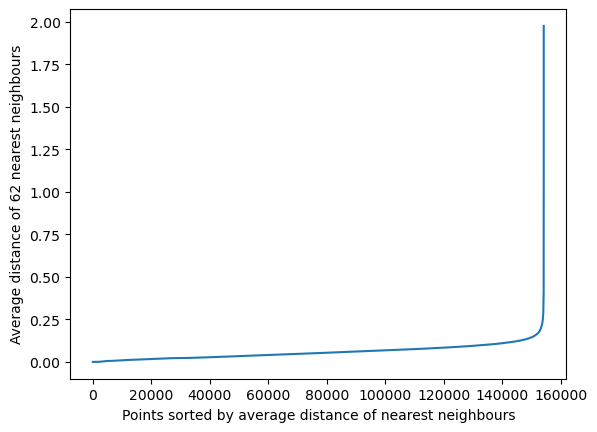

time taken for optimizing epsilon in DBSCAN is  21.373374462127686 seconds


In [54]:
plot_optimal_eps(df_num)

In [55]:
opt_esp = 0.2

In [58]:
labels = pseudo_labels(df_num,opt_esp)

time taken for this dbscan is  332.9945619106293 seconds


In [57]:
freq_labels(labels)

[[    -1   2594]
 [     0 151516]]


In [59]:
x1 = create_train(x1,labels)

[LightGBM] [Warning] boosting is set with boosting_type=gbdt, will be overridden by boost=gbdt. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
Best hyperparameters:  {'bagging_fraction': 0.6, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'num_leaves': 40}
Best score:  0.997686059831121
[LightGBM] [Info] Number of positive: 2594, number of negative: 151516
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7652
[LightGBM] [Info] Number of data points in the train set: 154110, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016832 -> initscore=-4.067490
[LightGBM] [Info] Start trai

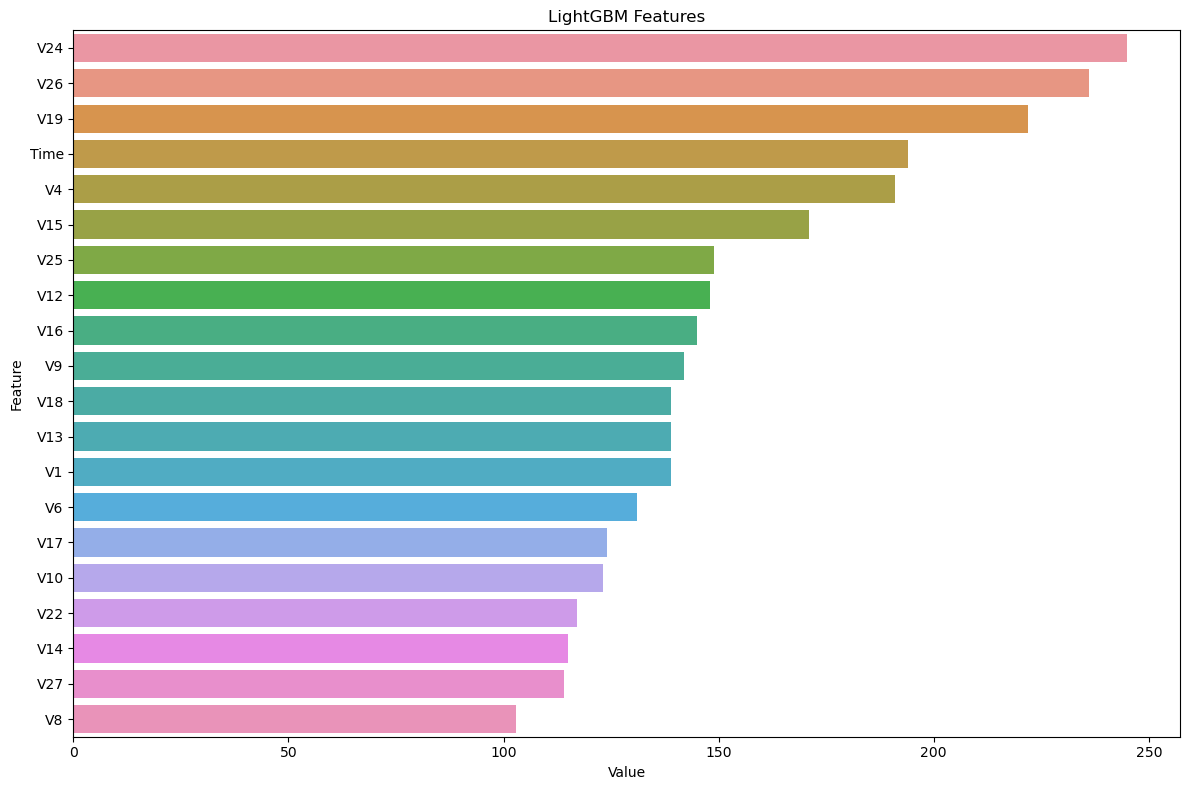

In [60]:
n = 5
clf = LightGBM_training(x1,5)

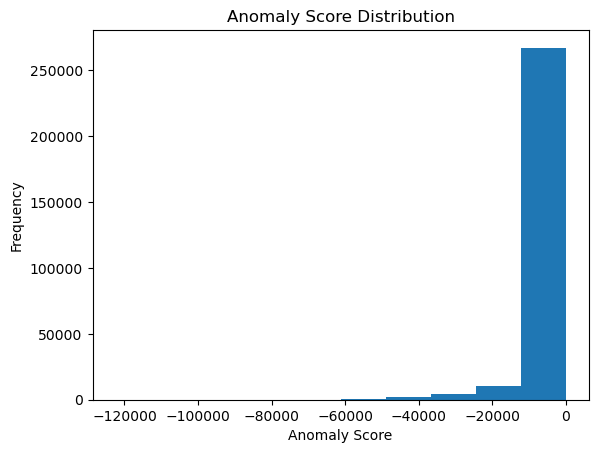

In [23]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Create a Gaussian mixture model object
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X)
# Compute the anomaly scores
log_prob = gmm.score_samples(X)
prob = np.exp(log_prob)
anomaly_scores = 1 - prob
plt.hist(anomaly_scores)
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()
